In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import print_function

import math
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from IPython import display
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd


import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
train_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
test_data  = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv", sep=",")

In [4]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [0]:
def pre_process_train_data(dataframe):
  features = dataframe.iloc[:,:-1]
  processed_features = features.copy()
  processed_features["rooms_per_person"] =  processed_features["total_rooms"] / processed_features["population"] 
  
  labels = pd.DataFrame()
  labels["median_house_value"] = dataframe.iloc[:,-1] / 1000.0
  return train_test_split(processed_features, labels, test_size = 0.3,shuffle=True)

def pre_process_test_data(dataframe):
  features = dataframe.iloc[:,:-1]
  processed_features = features.copy()
  processed_features["rooms_per_person"] =  processed_features["total_rooms"] / processed_features["population"] 
  
  labels = pd.DataFrame()
  labels["median_house_value"] = dataframe.iloc[:,-1] / 1000.0
  return processed_features, labels

In [0]:
X_train, X_val, y_train, y_val = pre_process_train_data(train_data)
X_test, y_test = pre_process_test_data(test_data)

In [8]:
display.display(X_train.describe())
display.display(X_val.describe())
display.display(y_train.describe())
display.display(y_val.describe())
display.display(X_test.describe())
display.display(y_test.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,-119.573534,35.637178,28.626387,2631.209580,536.380840,1421.580504,498.367395,3.888557,1.991724
std,2.010071,2.145190,12.546252,2109.256016,411.124785,1085.039934,375.346422,1.909449,1.271126
min,-124.300000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.018065
25%,-121.800000,33.930000,18.000000,1459.750000,296.000000,788.000000,281.000000,2.562125,1.522441
50%,-118.500000,34.260000,29.000000,2126.000000,433.000000,1161.500000,408.000000,3.552300,1.945845
75%,-118.007500,37.720000,37.000000,3146.000000,649.000000,1719.000000,605.000000,4.792100,2.302955
max,-114.310000,41.950000,52.000000,30401.000000,4957.000000,15037.000000,4616.000000,15.000100,55.222222


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,-119.535449,35.597333,28.502941,2672.725686,546.480784,1448.225294,507.882549,3.871961,1.955804
std,1.993618,2.118856,12.682177,2336.548687,444.728305,1282.429542,405.080447,1.905275,0.886445
min,-124.350000,32.540000,2.000000,8.000000,1.000000,8.000000,1.000000,0.499900,0.210938
25%,-121.760000,33.930000,18.000000,1467.750000,298.000000,793.000000,283.000000,2.576050,1.520893
50%,-118.470000,34.230000,28.000000,2130.000000,435.000000,1178.500000,412.000000,3.523050,1.931608
75%,-117.990000,37.692500,37.000000,3162.250000,648.000000,1726.000000,606.000000,4.687500,2.289639
max,-114.560000,41.860000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,22.581633


,median_house_value
count,11900.000000
mean,207.503385
std,116.394337
min,14.999000
25%,119.900000
50%,179.900000
75%,265.700000
max,500.001000


,median_house_value
count,5100.000000
mean,206.828476
std,115.030035
min,14.999000
25%,118.800000
50%,181.150000
75%,263.800000
max,500.001000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,1.966320
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,1.099930
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,0.035955
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,1.513472
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,1.922678
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,2.294729
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,33.843373


,median_house_value
count,3000.000000
mean,205.846275
std,113.119687
min,22.500000
25%,121.200000
50%,177.650000
75%,263.975000
max,500.001000


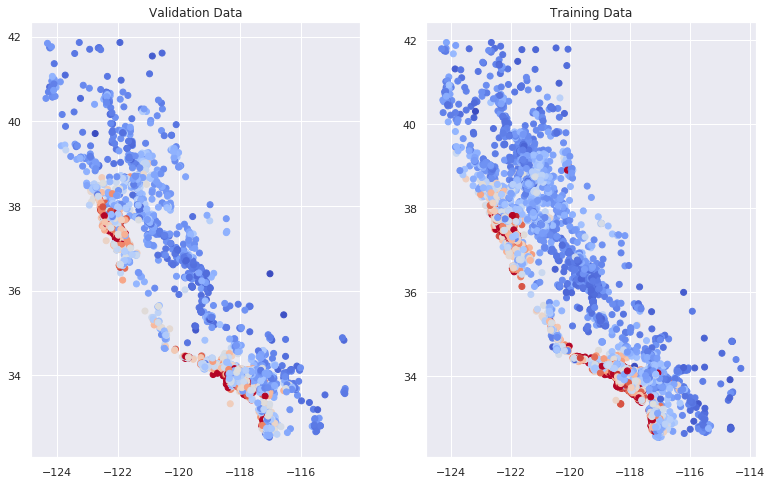

In [9]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")
plt.scatter(X_val["longitude"], X_val["latitude"],
            cmap="coolwarm",
            c=y_val["median_house_value"])

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")
plt.scatter(X_train["longitude"],
            X_train["latitude"],
            cmap="coolwarm",
            c=y_train["median_house_value"])
_ = plt.plot()

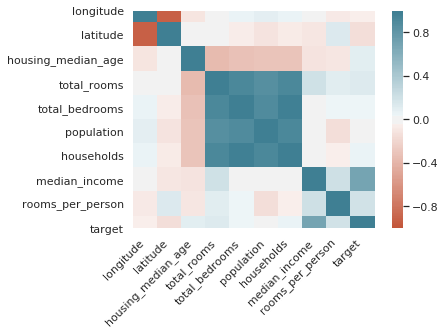

In [10]:
correlation_dataframe = X_train.copy()
correlation_dataframe["target"] = y_train["median_house_value"]

corr = correlation_dataframe.corr()
ax = sns.heatmap( corr, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20, 220, n=200),
                  square=True )
ax.set_xticklabels( ax.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right' );

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True,count=None):
  ds = tf.data.Dataset.from_tensor_slices((dict(features),targets))
  ds = ds.batch(batch_size).repeat(count)
  if shuffle:
    ds = ds.shuffle(10000)
  return ds

In [0]:
def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

In [0]:
def train_nn_regression_model( learning_rate, steps, batch_size, hidden_units, training_examples, training_targets, validation_examples, validation_targets):

  my_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipnorm =5.0)
  dnn_regressor = tf.estimator.DNNRegressor( feature_columns=construct_feature_columns(training_examples),
                                             hidden_units=hidden_units,
                                             optimizer=my_optimizer )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, training_targets["median_house_value"], batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, training_targets["median_house_value"], count=1, shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, validation_targets["median_house_value"], count=1, shuffle=False)

  print("Training model...")
  print("RMSE (on training data):")
  dnn_regressor.train( input_fn=training_input_fn,
                       steps=steps )
  
  training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
  training_predictions = np.array([item['predictions'][0] for item in training_predictions])
  
  validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
  validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
  
  # Compute training and validation loss.
  training_root_mean_squared_error = math.sqrt( metrics.mean_squared_error(training_predictions, training_targets))
  validation_root_mean_squared_error = math.sqrt( metrics.mean_squared_error(validation_predictions, validation_targets))
  
  print("Model training finished.")

  print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
  print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

  return dnn_regressor

In [14]:
dnn_regressor = train_nn_regression_model(
    learning_rate=0.01,
    steps=500,
    batch_size=10,
    hidden_units=[10, 2],
    training_examples=X_train,
    training_targets=y_train,
    validation_examples=X_val,
    validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4snovdet', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f42e1e72f60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
Instructions 

In [15]:
predict_testing_input_fn = lambda: my_input_fn(X_test, 
                                               y_test["median_house_value"], 
                                               count=1, 
                                               shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt( metrics.mean_squared_error(test_predictions, y_test))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4snovdet/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Final RMSE (on test data): 213.30


In [16]:
dnn_regressor = train_nn_regression_model(
    learning_rate=0.001,
    steps=2000,
    batch_size=100,
    hidden_units=[10, 10],
    training_examples=X_train,
    training_targets=y_train,
    validation_examples=X_val,
    validation_targets=y_val)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpk5arll0i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f42db541c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorfl

In [17]:
predict_testing_input_fn = lambda: my_input_fn(X_test, 
                                               y_test["median_house_value"], 
                                               count=1, 
                                               shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt( metrics.mean_squared_error(test_predictions, y_test))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpk5arll0i/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Final RMSE (on test data): 102.79
